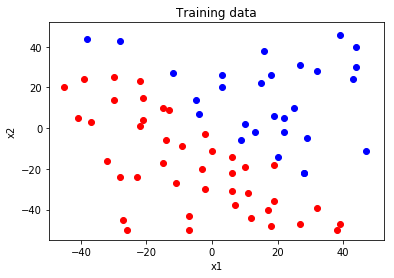

96.66666666666667
Error 0.013213270763105777


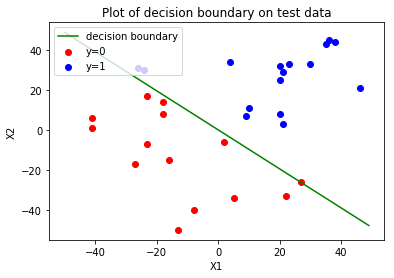

In [ ]:
#Gradient descent with multiple variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from mpl_toolkits.mplot3d import Axes3D

def sigmoid(x):
    return expit(x)

def grad_descent(X, Y, N, M,A,B):
    w_new=np.zeros(M)
    w_old=np.random.random(M)
    J=1
    J_values=[]
    i=0
    while(1):
        if(w_new==w_old).all() or i==5000:
            break
        else:
            y_pred=sigmoid(X.dot(w_new.T))
            #print(y_pred)
            
            error=y_pred-Y
            error=np.round(error,2)
            #print(error)
            cost=-1*(Y*(np.log(y_pred))+(1-Y)*np.log(1-y_pred))
            J=sum(cost)/N
            J_values.append(J)
            #print(x.T)
            gradient=np.round((X.T).dot(error),2)/N
            #print(gradient)
            w_old=w_new
            w_new=w_new-(.0001)*gradient.T
        i=i+1
    print("error",J)
    print("weights\n")
    print(w_new) 
    print("iterations",i)
    
    #plot of cost function
    fig1= plt.figure()
    plt.plot(np.arange(i),J_values,'b')
    plt.xlabel("iterations")
    plt.ylabel("Cost function")
    plt.title("Plot of cost function")
    plt.show()
    

    #plot of decision boundary
    fig=plt.figure()
    plt.scatter(A['Var2'],A['Var3'],color='r',marker='o',label="y=0")
    plt.scatter(B['Var2'],B['Var3'],color='b',marker='o',label="y=1")
    x1=np.arange(-50,50,1)
    x2=-1*(w_new['Var1']+w_new['Var2']*x1)/w_new['Var3']
    plt.plot(x1,x2,'g',label='decision boundary')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Plot of decision boundary on training data")
    plt.legend(loc=2)
    plt.show()
    
    return w_new


def test_model(test, test_y, wts, A, B):
#Weights
    ##wts=pd.Series([0.001905,-0.129117,0.002257,0.011750,0.031468,0.148164,0.005660])
    weights=wts
    J_values=[]
    #weights = pd.Series(wts)
    #print(weights.shape)
    pred=sigmoid(test.dot(weights))
    cost=pred-test_y
    
    correct_pred=np.sum(round(pred)==test_y)
    N_test=test.shape[0]
    #print(pred)
    # print(correct_pred)
    accuracy=correct_pred*100/N_test
    print(accuracy)
    #mean square error
    J=sum(cost)/N
    J_values.append(J)
    print("Error",J)
    fig=plt.figure()
    plt.scatter(A['Var2'],A['Var3'],color='r',marker='o',label="y=0")
    plt.scatter(B['Var2'],B['Var3'],color='b',marker='o',label="y=1")
    x1=np.arange(-50,50,1)
    x2=-1*(weights[0]+weights[1]*x1)/weights[2]
    plt.plot(x1,x2,'g',label='decision boundary')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Plot of decision boundary on test data")
    plt.legend(loc=2)
    plt.show()

    plt.show()
    
    
df=pd.read_csv("assignment2.csv")
##df=df1.dropna()
test=df.sample(frac=.3)
test_y=test[test.columns[1]]
#print(df)
test=test.drop(test.columns[0],axis=1)
test_A=test[test['y']==0]
test_B=test[test['y']==1]
test=test.drop(test.columns[0],axis=1)
#print(test)
train=df.drop(test.index)
A=train[train['y']==0]
B=train[train['y']==1]
#print(A)
Y=train[train.columns[1]]
#3print(Y)
x_original=train.drop(train.columns[0],axis=1)
#print(x_original)
X=x_original.drop(x_original.columns[0],axis=1)
#X.insert(0,"ones",1)
#print(df)
#print(X)

N=X.shape[0]#no of inputs
M=X.shape[1]#no of features
fig=plt.figure()
plt.scatter(A['Var2'],A['Var3'],color='r',marker='o')
plt.scatter(B['Var2'],B['Var3'],color='b',marker='o')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Training data")
plt.show()
#print(N,M)
#w_new=np.random.random(M)
#df.plot()
#wts=grad_descent(X,Y,N,M,A,B)
wts=[ -0.045462,  0.284918, 0.291230]
test_model(test,test_y,wts,test_A, test_B)